In [53]:
#Support vector regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import os
from sklearn.preprocessing import MinMaxScaler


In [55]:
dataset = pd.read_csv(r"C:/Users/mmerk/OneDrive/Desktop/Oblivion/univero sss/ai/archive/smoking_health_data_final1.csv")

In [57]:
dataset


,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,0,219.0
1,45,male,yes,64,121/72,0,248.0
2,58,male,yes,81,127.5/76,0,235.0
3,42,male,yes,90,122.5/80,0,225.0
4,42,male,yes,62,119/80,0,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60,254.0
3896,49,male,yes,70,123/75,60,213.0
3897,56,male,yes,70,125/79,60,246.0
3898,50,male,yes,85,134/95,60,340.0


In [59]:
dataset = dataset.fillna(0)

In [61]:
if 'sex' in dataset.columns:
    dataset = pd.get_dummies(dataset, columns=['sex'])
if 'current_smoker' in dataset.columns:
    dataset = pd.get_dummies(dataset, columns=['current_smoker'])

In [63]:
dataset

,age,heart_rate,blood_pressure,cigs_per_day,chol,sex_female,sex_male,current_smoker_no,current_smoker_yes
0,54,95,110/72,0,219.0,False,True,False,True
1,45,64,121/72,0,248.0,False,True,False,True
2,58,81,127.5/76,0,235.0,False,True,False,True
3,42,90,122.5/80,0,225.0,False,True,False,True
4,42,62,119/80,0,226.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...
3895,37,88,122.5/82.5,60,254.0,False,True,False,True
3896,49,70,123/75,60,213.0,False,True,False,True
3897,56,70,125/79,60,246.0,False,True,False,True
3898,50,85,134/95,60,340.0,False,True,False,True


In [65]:
if 'blood_pressure' in dataset.columns:
    dataset[['blood_pressure_systolic', 'blood_pressure_diastolic']] = dataset['blood_pressure'].str.split('/', expand=True)
    dataset = dataset.drop(['blood_pressure'], axis=1)


In [67]:
dataset['sex_female'] = dataset['sex_female'].replace({True: 1, False: 0})
dataset['sex_male'] = dataset['sex_male'].replace({True: 1, False: 0})
dataset['current_smoker_no'] = dataset['current_smoker_no'].replace({True: 1, False: 0})
dataset['current_smoker_yes'] = dataset['current_smoker_yes'].replace({True: 1, False: 0})
dataset

,age,heart_rate,cigs_per_day,chol,sex_female,sex_male,current_smoker_no,current_smoker_yes,blood_pressure_systolic,blood_pressure_diastolic
0,54,95,0,219.0,0,1,0,1,110,72
1,45,64,0,248.0,0,1,0,1,121,72
2,58,81,0,235.0,0,1,0,1,127.5,76
3,42,90,0,225.0,0,1,0,1,122.5,80
4,42,62,0,226.0,0,1,0,1,119,80
...,...,...,...,...,...,...,...,...,...,...
3895,37,88,60,254.0,0,1,0,1,122.5,82.5
3896,49,70,60,213.0,0,1,0,1,123,75
3897,56,70,60,246.0,0,1,0,1,125,79
3898,50,85,60,340.0,0,1,0,1,134,95


In [69]:
#X = dataset[['age', 'sex', 'current_smoker', 'heart_rate', 'cigs_per_day', 'blood_pressure_systolic', 'blood_pressure_diastolic']]
X = dataset[["age", "sex_female", "sex_male", "current_smoker_yes", "current_smoker_no", "heart_rate", "cigs_per_day", "blood_pressure_systolic", "blood_pressure_diastolic"]]

Y = dataset['chol']


C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

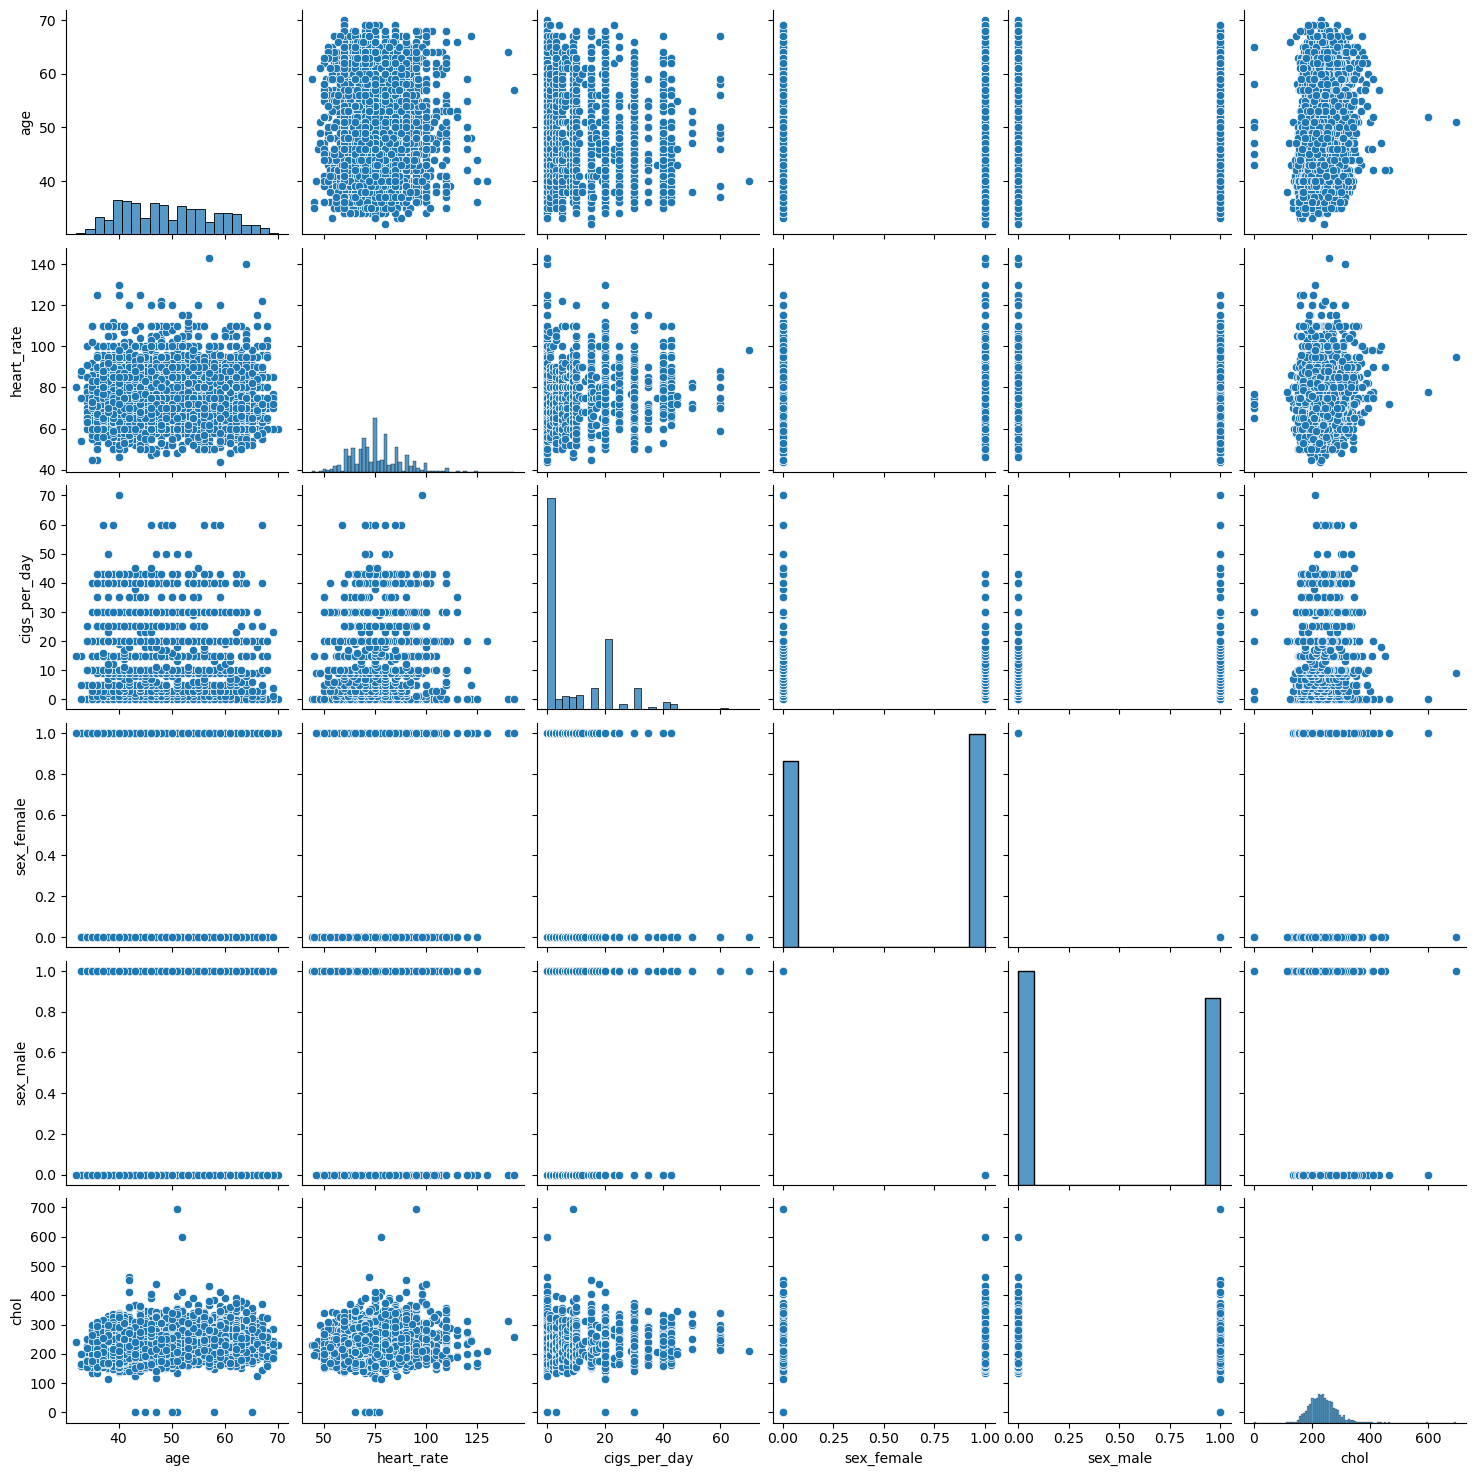

In [71]:
sns.pairplot(dataset[['age', 'heart_rate', 'cigs_per_day', 'sex_female','sex_male', 'chol', 'blood_pressure_systolic', 'blood_pressure_diastolic']])
plt.show()

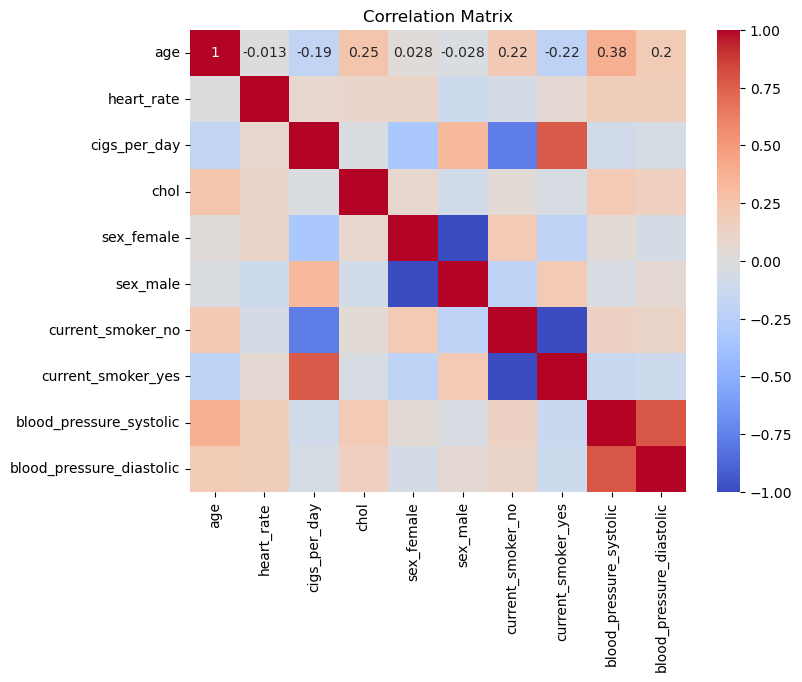

In [72]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



In [73]:
'''
This is a correlation heatmap, which is the sow relationships between different variables. 
Each cell shows the correlation coefficient (ranging from -1 to 1) between two variables, 
with the colour intensity indicating the strength and direction of the correlation. Red 
colour indicates a strong positive correlation, blue indicates a strong negative correlation, 
and neutral colours like white suggest no significant correlation. For example, "age" has a 
moderate positive correlation (0.38) with "blood_pressure_systolic," suggesting that systolic
blood pressure increases with age. In contrast, "sex_female" and "sex_male" are perfectly
negatively correlated (-1) due to their binary nature. The diagonal values are all one
because they represent a variable's correlation with itself.
'''

'\nThis is a correlation heatmap, which is the sow relationships between different variables. \nEach cell shows the correlation coefficient (ranging from -1 to 1) between two variables, \nwith the colour intensity indicating the strength and direction of the correlation. Red \ncolour indicates a strong positive correlation, blue indicates a strong negative correlation, \nand neutral colours like white suggest no significant correlation. For example, "age" has a \nmoderate positive correlation (0.38) with "blood_pressure_systolic," suggesting that systolic\nblood pressure increases with age. In contrast, "sex_female" and "sex_male" are perfectly\nnegatively correlated (-1) due to their binary nature. The diagonal values are all one\nbecause they represent a variable\'s correlation with itself.\n'

In [74]:
X

,age,sex_female,sex_male,current_smoker_yes,current_smoker_no,heart_rate,cigs_per_day,blood_pressure_systolic,blood_pressure_diastolic
0,54,0,1,1,0,95,0,110,72
1,45,0,1,1,0,64,0,121,72
2,58,0,1,1,0,81,0,127.5,76
3,42,0,1,1,0,90,0,122.5,80
4,42,0,1,1,0,62,0,119,80
...,...,...,...,...,...,...,...,...,...
3895,37,0,1,1,0,88,60,122.5,82.5
3896,49,0,1,1,0,70,60,123,75
3897,56,0,1,1,0,70,60,125,79
3898,50,0,1,1,0,85,60,134,95


In [75]:
test_size1 = 0.2
random_state1 = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size1, random_state=random_state1 )
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#test_size1 = 0.2 0.3 0.5
#random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



In [76]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

#scaler_X = MinMaxScaler()
#scaler_Y = MinMaxScaler()


#pakeiciau

In [77]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()


In [78]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

#svr_model = SVR(kernel='linear', C=100, epsilon=0.1)

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!111111 
svr_model.fit(X_train_scaled, Y_train_scaled)



SVR(C=100, gamma=0.1)

In [79]:

configurations = [
    {"C": 100, "gamma": 0.1, "kernel": "rbf", "epsilon": 0.1},
    {"C": 50, "gamma": 0.2, "kernel": "rbf", "epsilon": 0.1},
    

]
'''
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    "C": [10, 50, 100],
    "gamma": [0.01, 0.1, 0.5],
    "epsilon": [0.1, 0.2, 0.5]
}
grid_search = GridSearchCV(SVR(kernel="rbf"), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
'''
#pakeiciau

#!!!!!!!!!!!!!!!!!!!!!!!!!!! c

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVR\n\nparam_grid = {\n    "C": [10, 50, 100],\n    "gamma": [0.01, 0.1, 0.5],\n    "epsilon": [0.1, 0.2, 0.5]\n}\ngrid_search = GridSearchCV(SVR(kernel="rbf"), param_grid, cv=5)\ngrid_search.fit(X_train, Y_train)\nprint(grid_search.best_params_)\n'

In [80]:
results = []

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

In [83]:
Y_pred_scaled = svr_model.predict(X_test_scaled)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))

In [90]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [91]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 2227.7908
Mean Absolute Error: 35.3208
R-squared: -0.1113


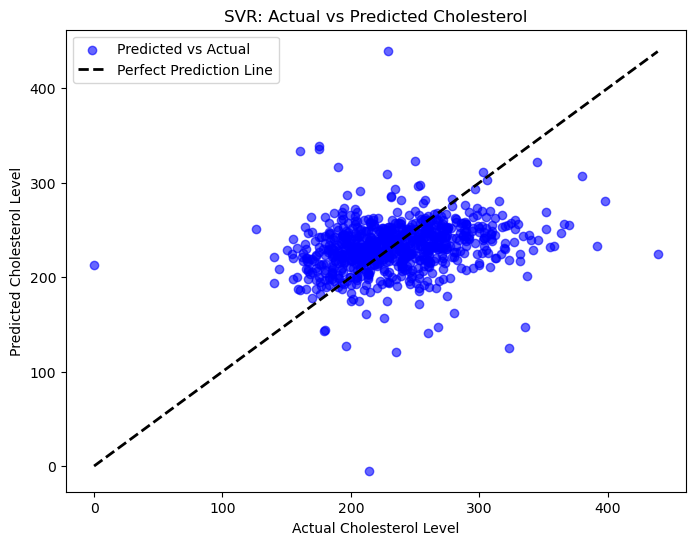

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Cholesterol Level')
plt.ylabel('Predicted Cholesterol Level')
plt.title('SVR: Actual vs Predicted Cholesterol')
plt.legend()
plt.show()

In [101]:
'''
This scatter plot compares the actual cholesterol levels to the predicted cholesterol 
levels from an SVR (Support Vector Regression) model. Each blue dot represents a data 
point where the x-axis is the actual cholesterol level, and the y-axis is the predicted
cholesterol level. The dashed black line represents the ideal case where predictions
perfectly match actual values. Points that are closer to the dashed line indicate better
Support vector regression model accuracy, while points that are farther away suggest
higher prediction errors. The clustering of points around the line shows that the
model performs reasonably well, but there is some dispersion present, indicating 
that there is room for improvement. Outliers, seen far from the dashed line, indicate 
cases where the model prediction deviates significantly from the actual value.
'''

'\nThis scatter plot compares the actual cholesterol levels to the predicted cholesterol \nlevels from an SVR (Support Vector Regression) model. Each blue dot represents a data \npoint where the x-axis is the actual cholesterol level, and the y-axis is the predicted\ncholesterol level. The dashed black line represents the ideal case where predictions\nperfectly match actual values. Points that are closer to the dashed line indicate better\nSupport vector regression model accuracy, while points that are farther away suggest\nhigher prediction errors. The clustering of points around the line shows that the\nmodel performs reasonably well, but there is some dispersion present, indicating \nthat there is room for improvement. Outliers, seen far from the dashed line, indicate \ncases where the model prediction deviates significantly from the actual value.\n'

C:\Users\mmerk\AppData\Local\Temp\ipykernel_42496\88242129.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Y_test, label="Actual Cholesterol Level", color="blue", shade=True)
C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmerk\AppData\Local\Temp\ipykernel_42496\88242129.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Y_pred.flatten(), label="Predicted Cholesterol Level", color="red", shade=True)
C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

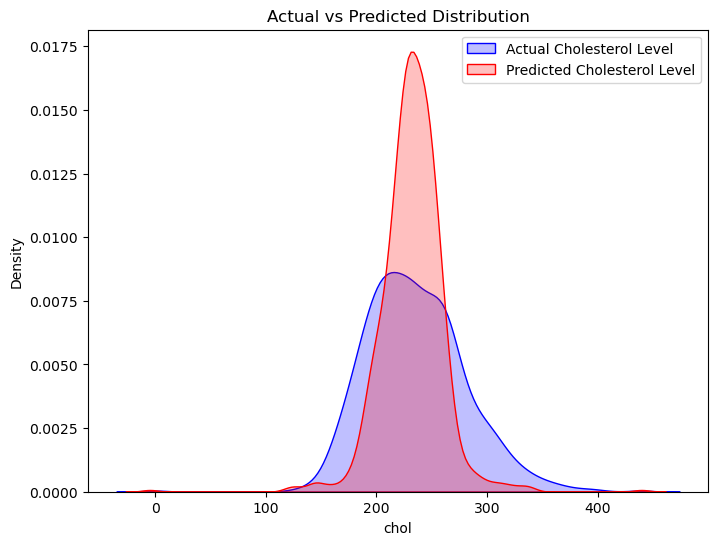

In [103]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Y_test, label="Actual Cholesterol Level", color="blue", shade=True)
sns.kdeplot(Y_pred.flatten(), label="Predicted Cholesterol Level", color="red", shade=True)
plt.legend()
plt.title("Actual vs Predicted Distribution")
plt.show()



In [105]:
'''
This plot shows the density distributions of actual cholesterol levels (blue curve)
and predicted cholesterol levels (red curve). The x-axis represents the cholesterol 
levels, while the y-axis represents the density or probability of occurrence for those l
evels. The overlap of the two curves indicates how closely the predicted values match 
the actual values. While the distributions have similar shapes, the red curve (predicted values) 
appears narrower and slightly shifted, suggesting that the model underestimates the variability
in cholesterol levels. The peak of the red curve is higher than that of the blue curve, indicating 
a concentration of predictions around the mean. The differences in the tails of the curves 
highlight areas where the model struggles to capture extreme values accurately.
'''

'\nThis plot shows the density distributions of actual cholesterol levels (blue curve)\nand predicted cholesterol levels (red curve). The x-axis represents the cholesterol \nlevels, while the y-axis represents the density or probability of occurrence for those l\nevels. The overlap of the two curves indicates how closely the predicted values match \nthe actual values. While the distributions have similar shapes, the red curve (predicted values) \nappears narrower and slightly shifted, suggesting that the model underestimates the variability\nin cholesterol levels. The peak of the red curve is higher than that of the blue curve, indicating \na concentration of predictions around the mean. The differences in the tails of the curves \nhighlight areas where the model struggles to capture extreme values accurately.\n'

In [107]:
dataset = {
    "Test_Size": test_size1,
    "Random_state": random_state1,
    "MSE": [mse],
    "MAE": [mae],
    "R2": [r2],


}

In [51]:
df = pd.DataFrame(dataset)
csv_file = "Support_vector_regression_Improve.csv"
if not os.path.isfile(csv_file):
    df.to_csv(csv_file, mode='a', header=True, index=False)
else:
    df.to_csv(csv_file, mode='a', header=False, index=False)
    print("Data move csv file") 